In [4]:
import os
print(os.getcwd())

/mnt/c/Users/User/Videos/VODs


In [10]:
import matplotlib.pyplot as plt

In [7]:
import time

In [37]:
import os
os.chdir("/mnt/c/Users/User/Videos/VODs/FighterZ/Stream29Marzo") #Path of video directory
curDir = os.getcwd()
print(curDir)

/mnt/c/Users/User/Videos/VODs/FighterZ/Stream29Marzo


In [38]:
!ls

'Screenshot_2021-03-29 Automatic Streaming Highlights - Jupyter Notebook.png'
 stream1.mp4
 stream1_cuts.mp4
 volumesPlot.png


In [22]:
def showTimeGraph(x1,y1): 
    fig, ax = plt.subplots() # Create a figure and an axes.
    ax.plot(x1,y1, label='OPT1') # Plot some data on the axes.

    ax.set(xlabel='Time (seconds)', ylabel='Volume',
        title='Volume at each second of the video')
    ax.grid()
    ax.legend()  # Add a legend.

    fig.savefig("volumesPlot.png")
    plt.show()
    return 1

In [23]:
import numpy as np # for numerical operations
from moviepy.editor import VideoFileClip, concatenate

start = time.time()

clip = VideoFileClip("stream1.mp4")
cut = lambda i: clip.audio.subclip(i,i+1).to_soundarray(fps=22000)
volume = lambda array: np.sqrt(((1.0*array)**2).mean())
volumes = [volume(cut(i)) for i in range(0,int(clip.duration-1))]

end = time.time()
print(end - start)

25.321000814437866


In [24]:
print(len(volumes))

a_list = list(range(0, len(volumes)))

#print(a_list)

10387


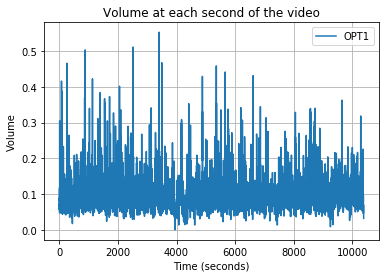

1

In [25]:
showTimeGraph(a_list, volumes)

In [26]:
averaged_volumes = np.array([sum(volumes[i:i+10])/10
                             for i in range(len(volumes)-10)])

In [28]:
a_list = list(range(0, len(volumes)-10))

In [29]:
print(len(a_list))

10377


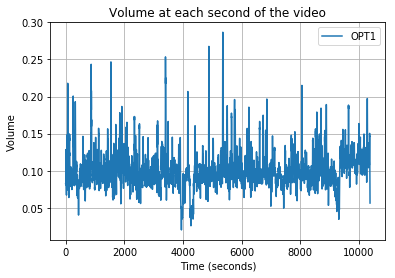

1

In [30]:
showTimeGraph(a_list, averaged_volumes)

In [31]:
increases = np.diff(averaged_volumes)[:-1]>=0
decreases = np.diff(averaged_volumes)[1:]<=0
peaks_times = (increases * decreases).nonzero()[0]
peaks_vols = averaged_volumes[peaks_times]
peaks_times = peaks_times[peaks_vols>np.percentile(peaks_vols,90)]

In [32]:
final_times=[peaks_times[0]]
for t in peaks_times:
    if (t - final_times[-1]) < 60:
        if averaged_volumes[t] > averaged_volumes[final_times[-1]]:
            final_times[-1] = t
    else:
        final_times.append(t)

In [34]:
print(final_times)

[69, 130, 254, 327, 587, 869, 960, 1021, 1127, 1431, 1542, 1639, 1708, 1843, 1914, 1989, 2094, 2341, 2515, 2640, 2809, 3133, 3276, 3402, 3493, 3635, 3906, 4164, 4410, 4671, 4881, 5023, 5356, 5430, 5508, 5651, 5757, 5835, 5930, 6245, 6319, 6612, 6731, 6857, 7050, 7118, 7691, 7813, 8052, 8424, 8561, 8704, 8885, 9448, 9534, 9645, 9760, 9830, 9996, 10169, 10282, 10361]


In [35]:
start = time.time()
final = concatenate([clip.subclip(max(t-5,0),min(t+5, clip.duration))
                     for t in final_times])
final.to_videofile('stream1_cuts.mp4') # low quality is the default
end = time.time()
print("Time of the algorithm: ")
print(end - start)

[MoviePy] >>>> Building video stream1_cuts.mp4
[MoviePy] Writing audio in stream1_cutsTEMP_MPY_wvf_snd.mp3


100%|██████████| 13671/13671 [00:27<00:00, 489.57it/s]

[MoviePy] Done.
[MoviePy] Writing video stream1_cuts.mp4



100%|█████████▉| 37200/37201 [14:46<00:00, 41.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: stream1_cuts.mp4 

Time of the algorithm: 
949.45099401474
